In [42]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
        "C:/Users/HariS/Desktop/Datasets/potato")

Found 2152 files belonging to 3 classes.


In [3]:
class_names=dataset.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

In [4]:
len(dataset)

68

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

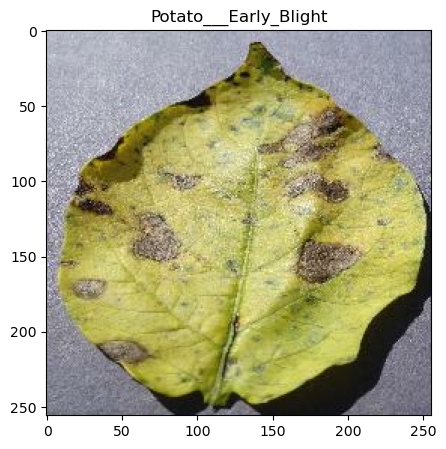

In [6]:
plt.figure(figsize=(5,5))
for image_batch, label_batch in dataset:
    plt.title(class_names[label_batch[0]])
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [7]:
train_size=0.8
len(dataset)* train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)* val_size

6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=15)
        
    train_size=int(train_split * ds_size) 
    val_size=int(val_split * ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds   

In [14]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [43]:
n_classes=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),             
])

model.build(input_shape=input_shape)  

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
 )

Epoch 1/50
54/54 [==============================] - 75s 1s/step - loss: 0.8594 - accuracy: 0.4994 - val_loss: 0.6866 - val_accuracy: 0.6543
Epoch 2/50
54/54 [==============================] - 77s 1s/step - loss: 0.5797 - accuracy: 0.7277 - val_loss: 0.5965 - val_accuracy: 0.7559
Epoch 3/50
54/54 [==============================] - 77s 1s/step - loss: 0.4301 - accuracy: 0.8087 - val_loss: 0.3582 - val_accuracy: 0.8721
Epoch 4/50
54/54 [==============================] - 77s 1s/step - loss: 0.3685 - accuracy: 0.8468 - val_loss: 0.3572 - val_accuracy: 0.8427
Epoch 5/50
54/54 [==============================] - 77s 1s/step - loss: 0.3199 - accuracy: 0.8680 - val_loss: 0.3223 - val_accuracy: 0.8550
Epoch 6/50
54/54 [==============================] - 89s 2s/step - loss: 0.2967 - accuracy: 0.8791 - val_loss: 0.1898 - val_accuracy: 0.9296
Epoch 7/50
54/54 [==============================] - 86s 2s/step - loss: 0.2256 - accuracy: 0.9120 - val_loss: 0.1506 - val_accuracy: 0.9442
Epoch 8/50
54/54 [==

In [47]:
scores=model.evaluate(test_ds)

54/54 [==============================] - 15s 280ms/step - loss: 0.0201 - accuracy: 0.9930


In [48]:
scores

[0.020073411986231804, 0.9929577708244324]

In [49]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
history.history['accuracy']

[0.4994131326675415,
 0.7276995182037354,
 0.8086854219436646,
 0.8468309640884399,
 0.8679577708244324,
 0.8791079521179199,
 0.9119718074798584,
 0.922535240650177,
 0.9419013857841492,
 0.9377934336662292,
 0.9477699398994446,
 0.9512910842895508,
 0.9507042169570923,
 0.9700704216957092,
 0.9612675905227661,
 0.9600939154624939,
 0.9776995182037354,
 0.9771126508712769,
 0.9612675905227661,
 0.9683098793029785,
 0.9636150002479553,
 0.9600939154624939,
 0.9794601202011108,
 0.9636150002479553,
 0.9853286147117615,
 0.9911971688270569,
 0.9888497591018677,
 0.9853286147117615,
 0.9747652411460876,
 0.9900234937667847,
 0.9735915660858154,
 0.9835680723190308,
 0.9882628917694092,
 0.9688966870307922,
 0.9847418069839478,
 0.9823943376541138,
 0.9876760840415955,
 0.9888497591018677,
 0.9900234937667847,
 0.9823943376541138,
 0.9876760840415955,
 0.9953051805496216,
 0.9947183132171631,
 0.9929577708244324,
 0.9794601202011108,
 0.9829812049865723,
 0.9917840361595154,
 0.99354457855

In [52]:
accuracy=history.history['accuracy']

val_acc=history.history['val_accuracy']

loss=history.history['loss']

val_loss=history.history['val_loss']

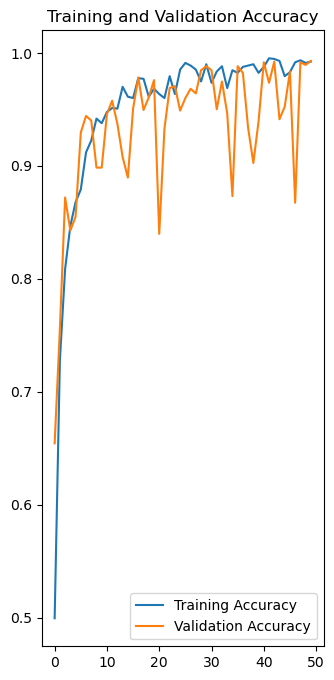

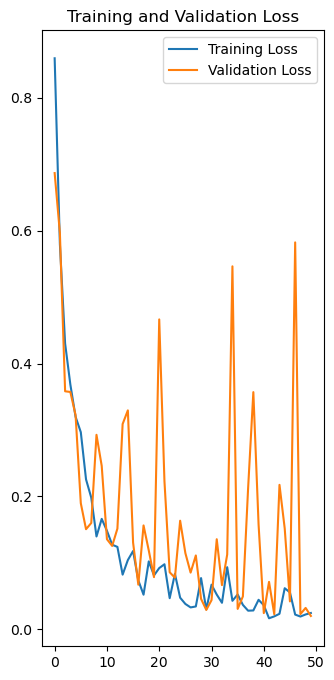

In [78]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    
    img_array=tf.expand_dims(img_array, 0)
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

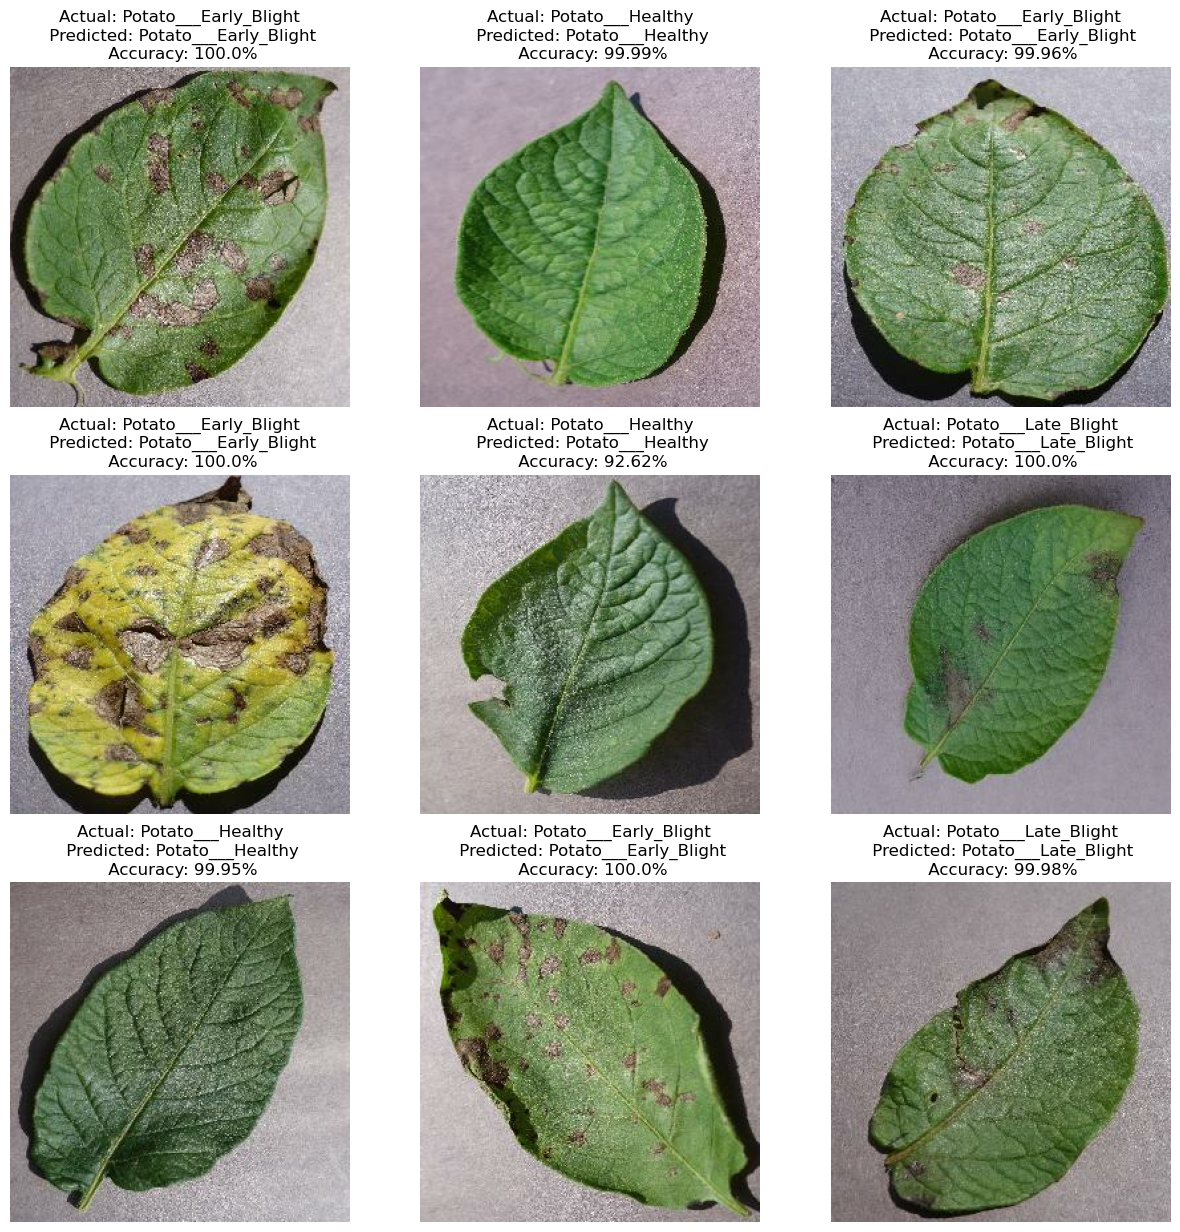

In [79]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model, images[i])
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\n Accuracy: {confidence}%")
        
        plt.axis("off")